The code below will likely give you a warning after it installs -- no worries, just restart your session and move on to the second code chunk!

In [ ]:
! pip install opencv-python
! pip install imageAI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 1.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os

#! pip install imageai

from imageai.Detection import ObjectDetection

os.chdir("/content/drive/MyDrive/Models")

detector = ObjectDetection()

# You can find all of the model object at the following site:
# https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Classification/README.md

# Your goal is find some images to play with!

model_path = "./cv_models/tiny-yolov3.pt"
#model_path = "./Models/yolov3.pt"
#model_path = "./Models/retinanet_resnet50_fpn_coco-eeacb38bpt" # Can be weird!
input_path = "./input/Copy of happy_people.jpg"
output_path = "./output/Copy of happy_people_label.jpg"

detector.setModelTypeAsTinyYOLOv3()
#detector.setModelTypeAsYOLOv3()
#detector.setModelTypeAsRetinaNet() # Can be weird!
detector.setModelPath(model_path)
detector.loadModel()

detections, extracted_objects = detector.detectObjectsFromImage(input_image=input_path, output_image_path=output_path, 
                                                                extract_detected_objects=True, minimum_percentage_probability=10)

for eachItem in detections:
    print(eachItem["name"] , " : ", eachItem["percentage_probability"])

person  :  99.99
person  :  99.98
person  :  99.91
person  :  99.92
person  :  99.65


In [ ]:
extracted_objects

['./output/happy_people_label-extracted/happy_people_label-1.jpg',
 './output/happy_people_label-extracted/happy_people_label-2.jpg',
 './output/happy_people_label-extracted/happy_people_label-3.jpg',
 './output/happy_people_label-extracted/happy_people_label-4.jpg',
 './output/happy_people_label-extracted/happy_people_label-5.jpg']

In [ ]:
detections

[{'name': 'person',
  'percentage_probability': 99.99,
  'box_points': [117, 60, 164, 182]},
 {'name': 'person',
  'percentage_probability': 99.98,
  'box_points': [62, 54, 116, 186]},
 {'name': 'person',
  'percentage_probability': 99.91,
  'box_points': [180, 41, 235, 184]},
 {'name': 'person',
  'percentage_probability': 99.92,
  'box_points': [153, 53, 192, 186]},
 {'name': 'person',
  'percentage_probability': 99.65,
  'box_points': [2, 37, 56, 187]}]

In [ ]:
# All the models are here: https://keras.io/api/applications/#usage-examples-for-image-classification-models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = "./input/Copy of stroke_sim.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top = 10)[0])


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02916936', 'bulletproof_vest', 0.31772748), ('n03617480', 'kimono', 0.18268555), ('n02895154', 'breastplate', 0.17831601), ('n03146219', 'cuirass', 0.055244412), ('n02749479', 'assault_rifle', 0.028418463), ('n02769748', 'backpack', 0.023074802), ('n03000247', 'chain_mail', 0.017687157), ('n03868863', 'oxygen_mask', 0.014873434), ('n03763968', 'military_uniform', 0.013486821), ('n03929855', 'pickelhaube', 0.012281301)]


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [5, 10]
pyplot.rcParams['figure.dpi'] = 200
from numpy import expand_dims

model = VGG19()

ixs = [2, 5, 9, 13, 17]

outputs = [model.layers[i].output for i in ixs]

model = Model(inputs = model.inputs, outputs = outputs)

img_path = "./input/Copy of stroke_sim.jpg"

img = load_img(img_path, target_size = [224, 224])

img = img_to_array(img)

img = expand_dims(img, axis = 0)

img = preprocess_input(img)

feature_maps = model.predict(img)

1/1 [==============================] - 1s 798ms/step


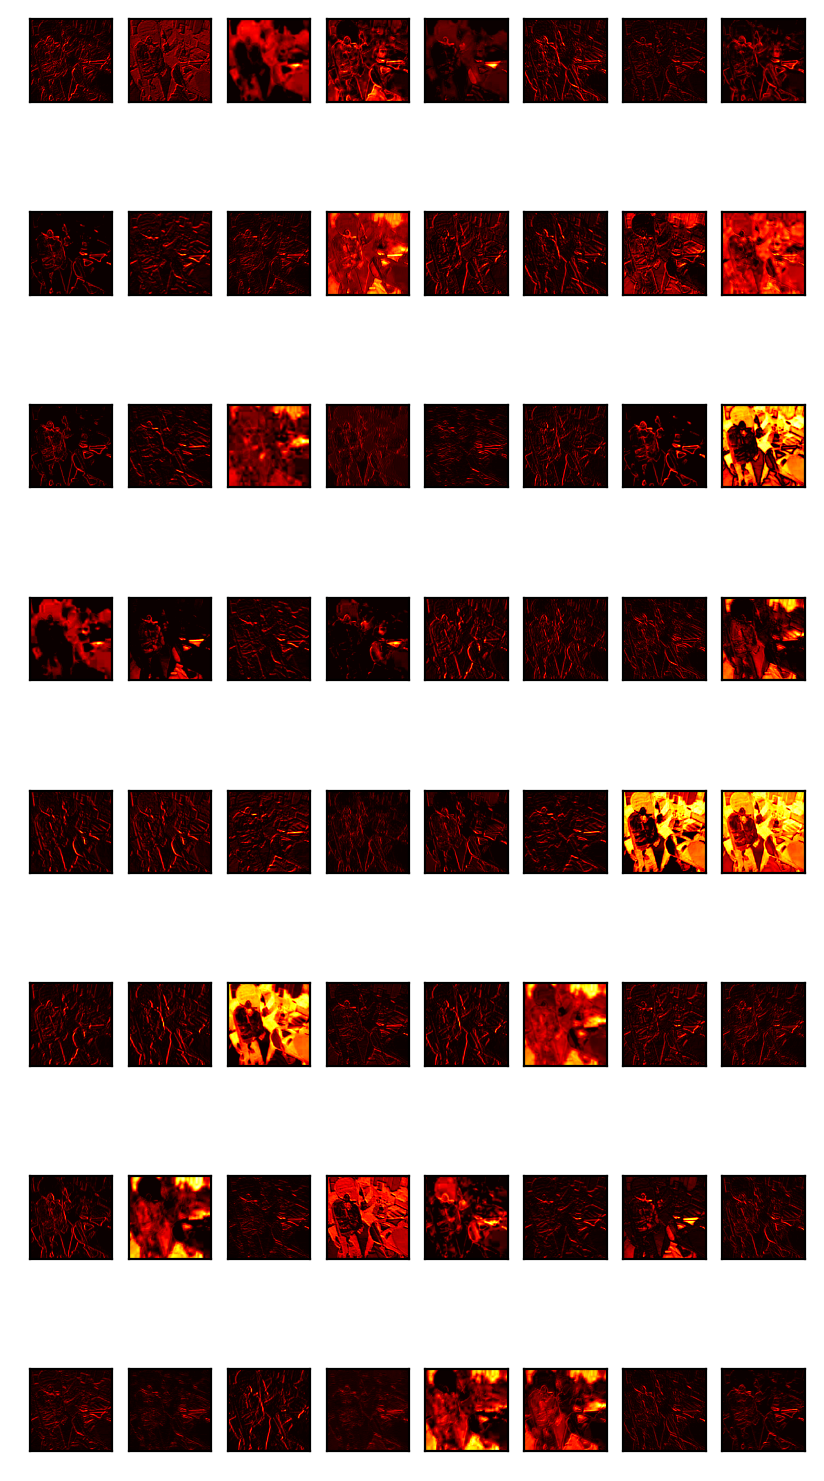

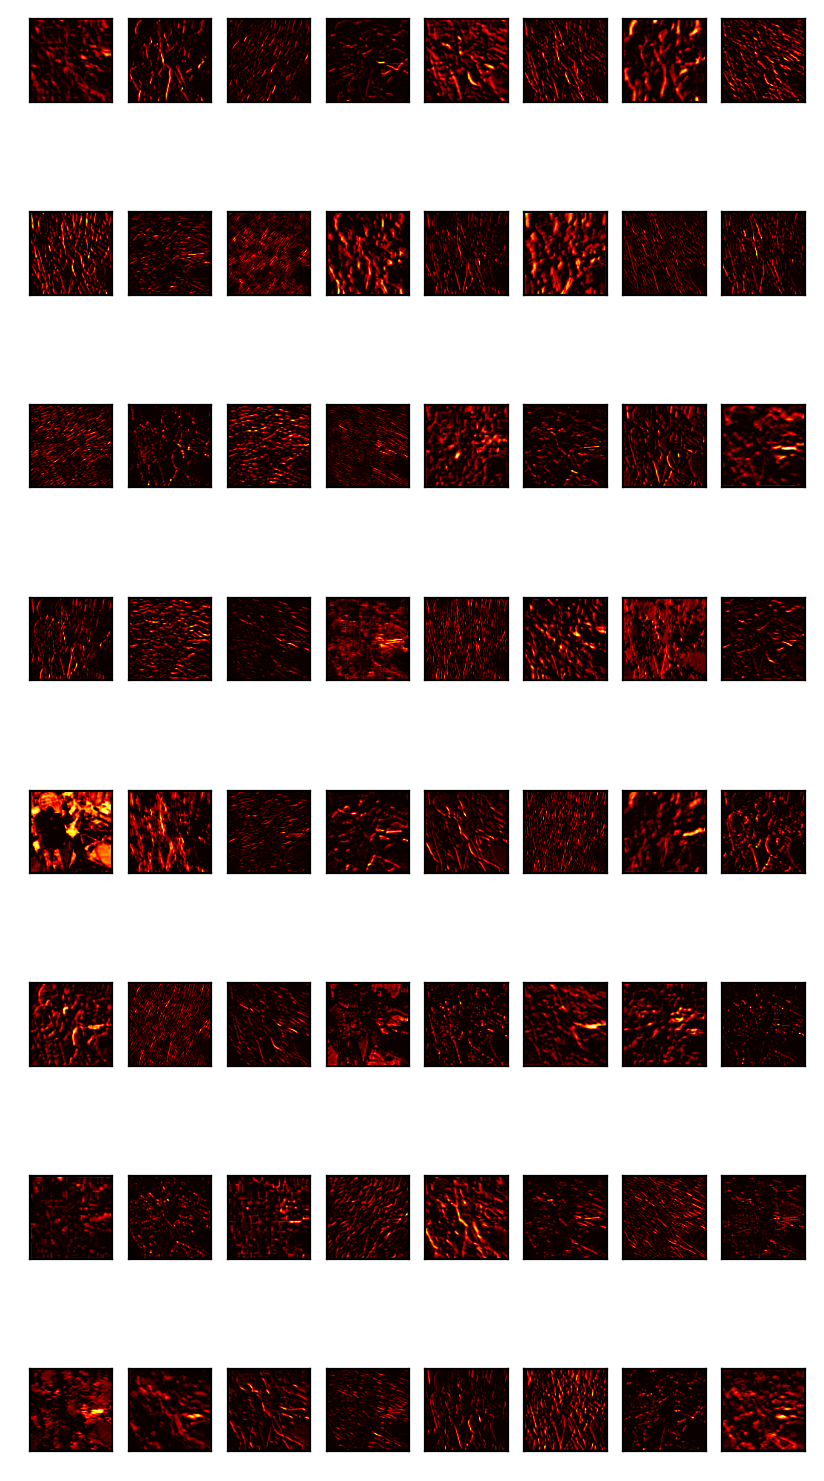

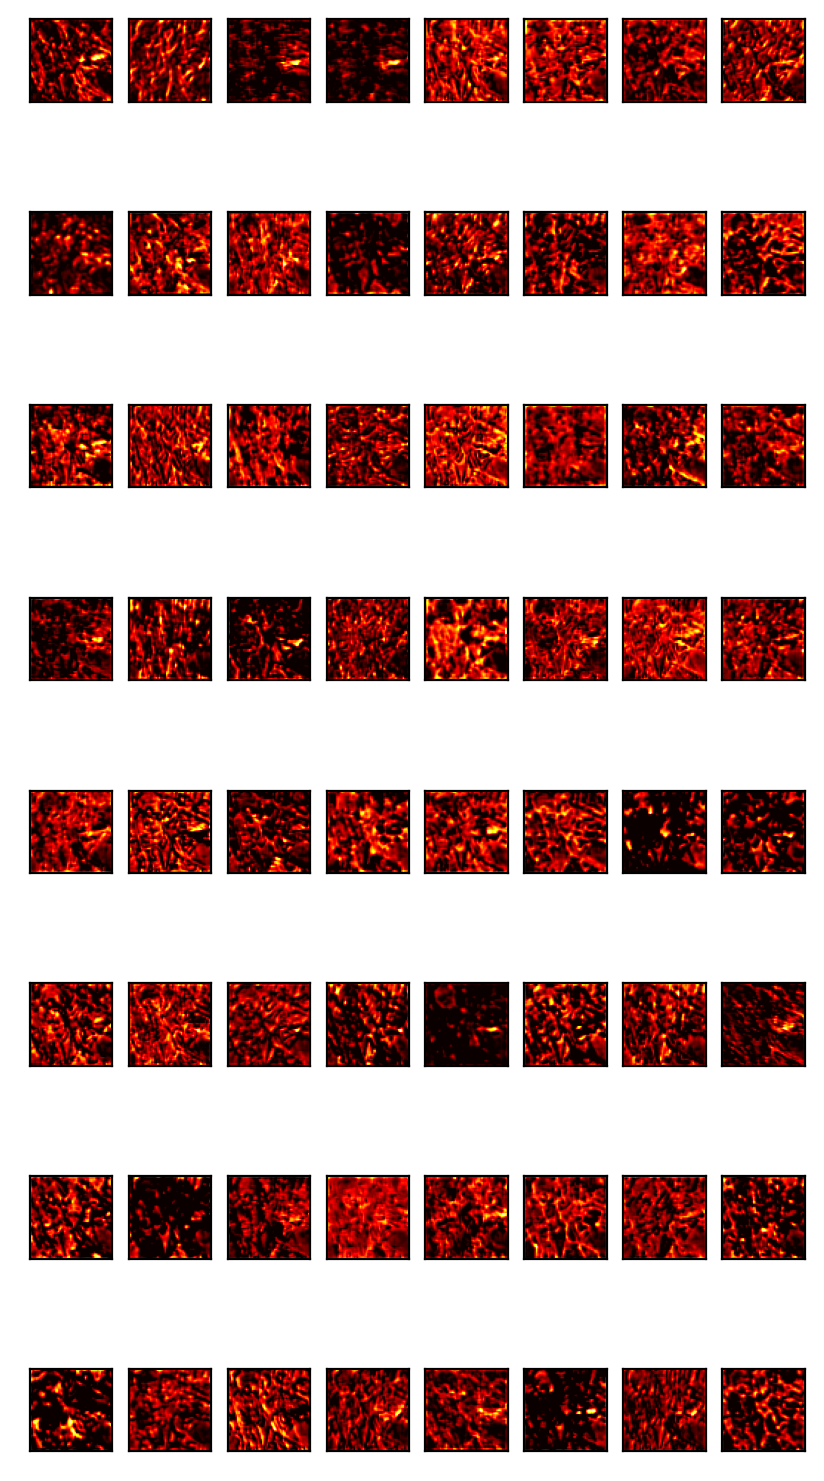

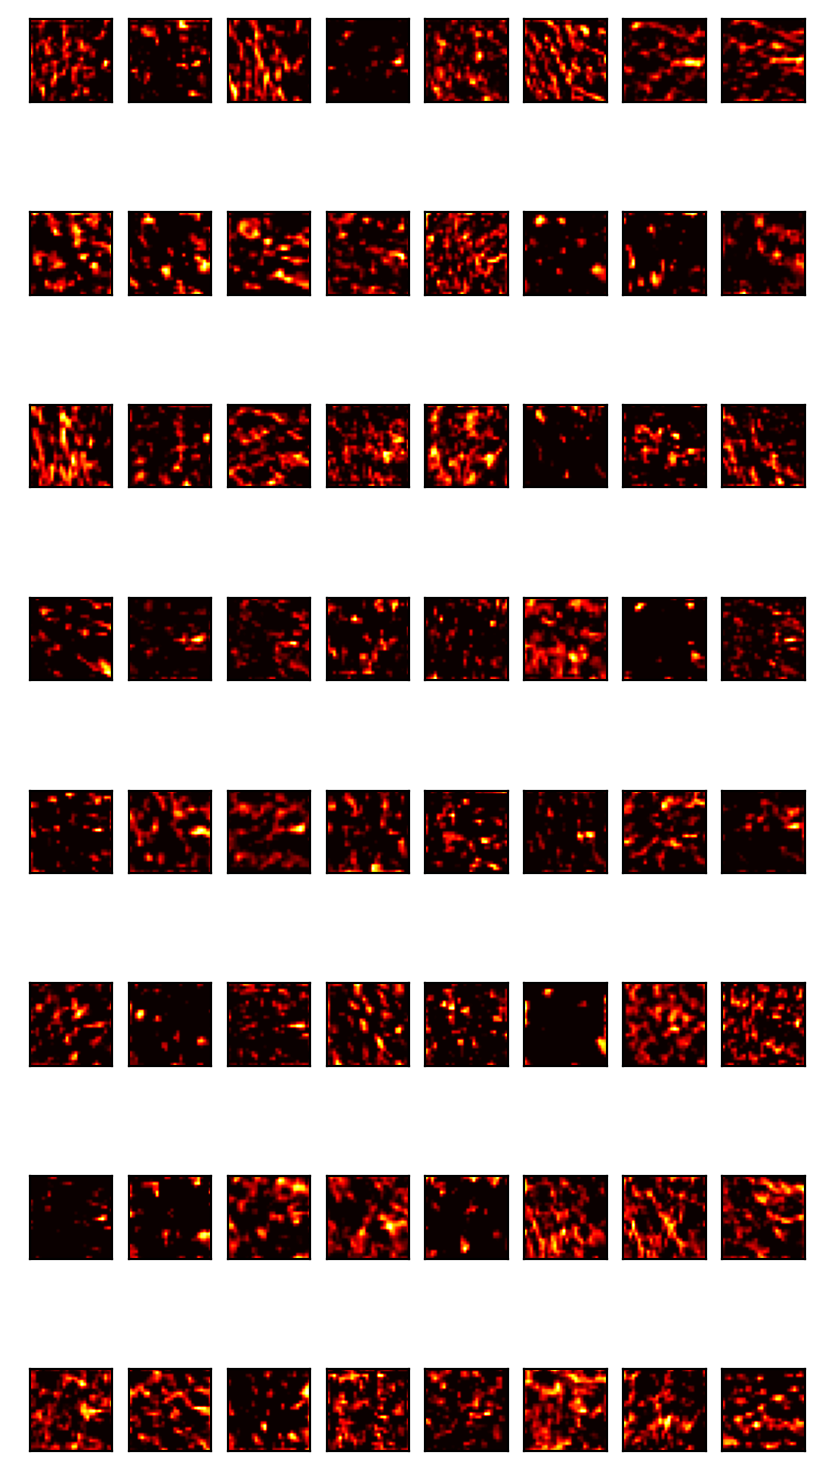

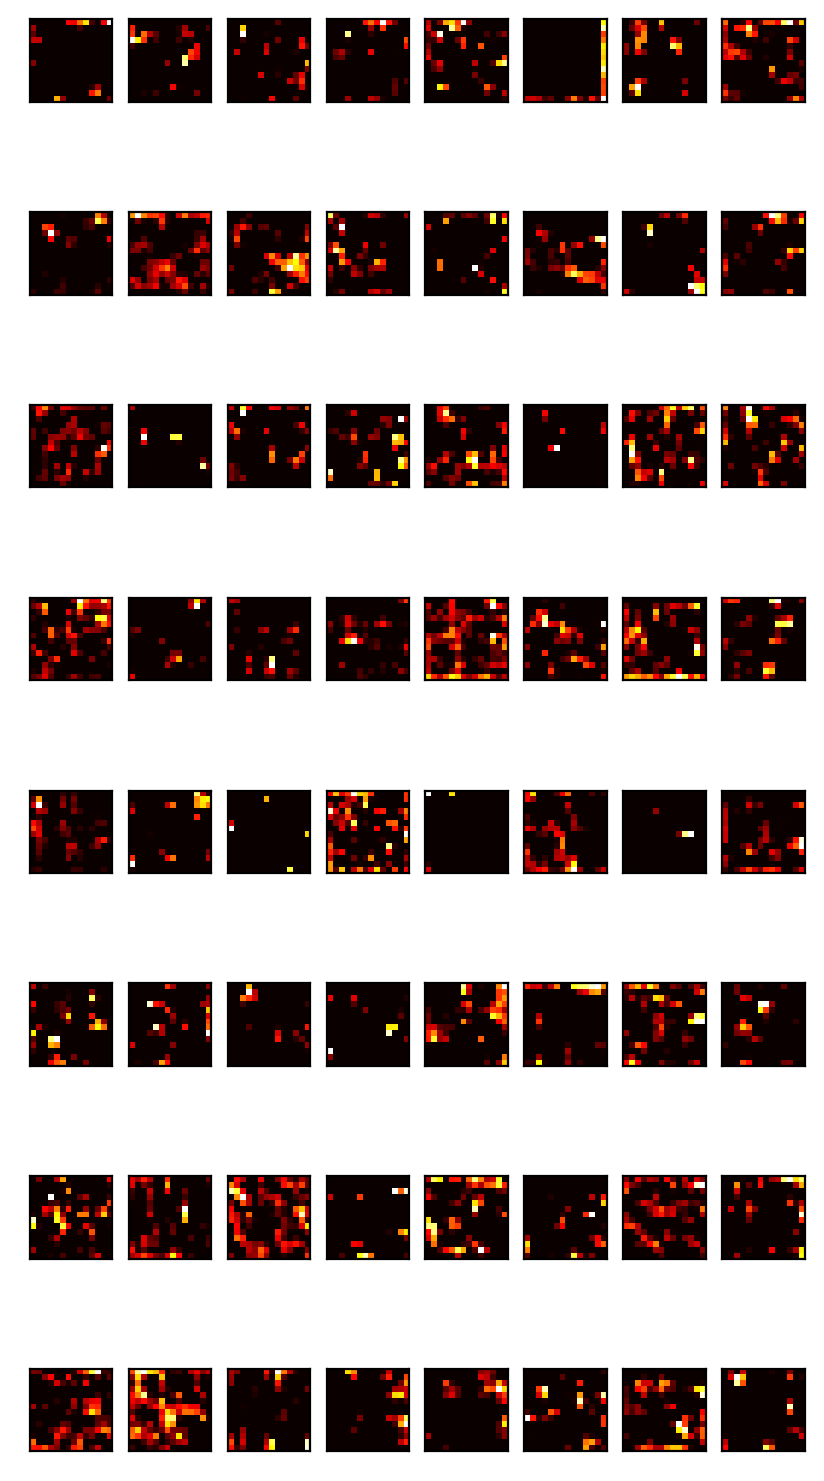

In [ ]:
square = 8

for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        for _ in range(square):
          ax = pyplot.subplot(square, square, ix)
          ax.set_xticks([])
          ax.set_yticks([])
          pyplot.imshow(fmap[0, :, :, ix-1], cmap = 'hot')
          ix += 1
    pyplot.show()